In [4]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.stats
from scipy.stats import kstest

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
df=pd.read_csv('test_1.csv')
df.head()

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417


In [33]:
test=df[df['group']=='test']
control=df[df['group']=='control']

(array([ 1.,  1.,  3.,  4.,  2.,  6., 14., 24., 21., 45., 62., 59., 64.,
        87., 86., 84., 87., 64., 68., 58., 53., 42., 17., 13.,  8.,  7.,
         3.,  2.,  1.,  2.]),
 array([42.61987143, 43.17597129, 43.73207114, 44.288171  , 44.84427085,
        45.40037071, 45.95647056, 46.51257042, 47.06867028, 47.62477013,
        48.18086999, 48.73696984, 49.2930697 , 49.84916956, 50.40526941,
        50.96136927, 51.51746912, 52.07356898, 52.62966884, 53.18576869,
        53.74186855, 54.2979684 , 54.85406826, 55.41016812, 55.96626797,
        56.52236783, 57.07846768, 57.63456754, 58.1906674 , 58.74676725,
        59.30286711]),
 <a list of 30 Patch objects>)

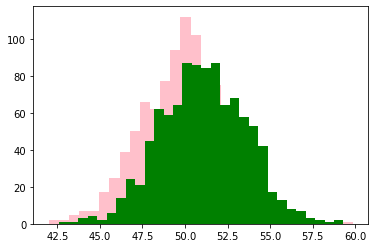

In [34]:
plt.hist(test.target.values,bins=30,color='pink')
plt.hist(control.target.values,bins=30,color='green')

(array([  2.,   2.,   5.,   7.,   7.,  17.,  25.,  39.,  50.,  66.,  62.,
         77.,  94., 112., 102.,  82.,  75.,  50.,  44.,  33.,  26.,  14.,
          7.,   4.,   3.,   1.,   2.,   0.,   1.,   1.]),
 array([41.9872647 , 42.58290742, 43.17855014, 43.77419286, 44.36983558,
        44.9654783 , 45.56112103, 46.15676375, 46.75240647, 47.34804919,
        47.94369191, 48.53933463, 49.13497735, 49.73062008, 50.3262628 ,
        50.92190552, 51.51754824, 52.11319096, 52.70883368, 53.3044764 ,
        53.90011912, 54.49576185, 55.09140457, 55.68704729, 56.28269001,
        56.87833273, 57.47397545, 58.06961817, 58.6652609 , 59.26090362,
        59.85654634]),
 <a list of 30 Patch objects>)

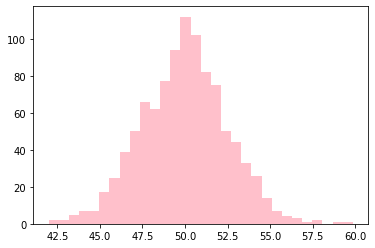

In [35]:
plt.hist(test.target.values,bins=30,color='pink')

(array([ 1.,  1.,  3.,  4.,  2.,  6., 14., 24., 21., 45., 62., 59., 64.,
        87., 86., 84., 87., 64., 68., 58., 53., 42., 17., 13.,  8.,  7.,
         3.,  2.,  1.,  2.]),
 array([42.61987143, 43.17597129, 43.73207114, 44.288171  , 44.84427085,
        45.40037071, 45.95647056, 46.51257042, 47.06867028, 47.62477013,
        48.18086999, 48.73696984, 49.2930697 , 49.84916956, 50.40526941,
        50.96136927, 51.51746912, 52.07356898, 52.62966884, 53.18576869,
        53.74186855, 54.2979684 , 54.85406826, 55.41016812, 55.96626797,
        56.52236783, 57.07846768, 57.63456754, 58.1906674 , 58.74676725,
        59.30286711]),
 <a list of 30 Patch objects>)

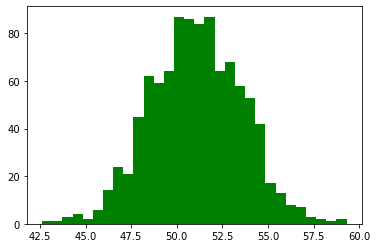

In [36]:
plt.hist(control.target.values,bins=30,color='green')

## Проверим обе выборки на нормальное распределение, чтобы понять, по какому критерию смотреть различие средних

H0: x взята из генеральной совокупности с распределением F (оно может быть любым: нормальное, экспоненциальное и т.д.)

H1: x взята из генеральной совокупности с другим распределением

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([41.9872647 , 42.37260039, 42.76632564, ..., 57.96396432,
         59.2103887 , 59.85654634])),
 (2.5228902582671515, 49.95894395407758, 0.9988696017296786))

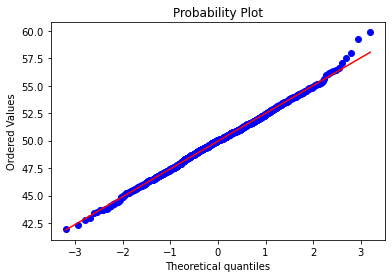

In [41]:
ss.probplot(test.target.values, dist="norm", plot=pylab)

((array([-3.19410727e+00, -2.92862832e+00, -2.78046228e+00, -2.67595340e+00,
         -2.59441353e+00, -2.52716372e+00, -2.46970815e+00, -2.41940604e+00,
         -2.37456967e+00, -2.33405267e+00, -2.29703965e+00, -2.26292923e+00,
         -2.23126477e+00, -2.20169104e+00, -2.17392612e+00, -2.14774237e+00,
         -2.12295322e+00, -2.09940385e+00, -2.07696424e+00, -2.05552417e+00,
         -2.03498932e+00, -2.01527836e+00, -1.99632062e+00, -1.97805432e+00,
         -1.96042511e+00, -1.94338493e+00, -1.92689103e+00, -1.91090528e+00,
         -1.89539343e+00, -1.88032467e+00, -1.86567116e+00, -1.85140764e+00,
         -1.83751113e+00, -1.82396067e+00, -1.81073706e+00, -1.79782272e+00,
         -1.78520143e+00, -1.77285827e+00, -1.76077946e+00, -1.74895220e+00,
         -1.73736465e+00, -1.72600580e+00, -1.71486537e+00, -1.70393379e+00,
         -1.69320212e+00, -1.68266198e+00, -1.67230553e+00, -1.66212540e+00,
         -1.65211467e+00, -1.64226681e+00, -1.63257570e+00, -1.62303553e+00,

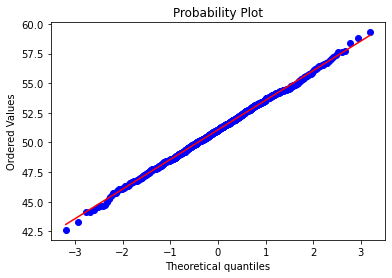

In [42]:
ss.probplot(control.target.values, dist="norm", plot=pylab)

In [46]:
ss.shapiro(test.target.values)

ShapiroResult(statistic=0.9980449080467224, pvalue=0.29410168528556824)

In [47]:
ss.shapiro(control.target.values)

ShapiroResult(statistic=0.999168336391449, pvalue=0.9478589296340942)

### Делаем вывод, что обе выборки имеют нормально распределение, будем использовать двухвыборочный t-критерий

H0: различие средних незначимо => m1=m2

In [49]:
ss.ttest_ind(test.target.values,control.target.values,equal_var=False)

Ttest_indResult(statistic=-9.879422047254666, pvalue=1.6631546220432403e-22)

Отвергаем нулевую гипотезу о равенстве средних в двух выборках => m1!=m2. Получается, что между выборками есть значительное различие. Результат статитсически значим.